In [1]:
# Denzil Samuel
# BE IT
# Roll no. 9081
# Assignment 3: b) Animal (DOG and CAT) dataset
# Build the Image Classification Model by dividing model into 4 stages: 
# Loading and preprocessing the image, Defining the model architecture, Training the model, Estimating the model's performance

### Installing Libraries

In [2]:
!pip install tensorflow 
!pip install keras.models
!pip install keras.datasets

  Using cached keras_models-0.0.7-py3-none-any.whl (18 kB)


  Using cached keras_datasets-0.1.0-py2.py3-none-any.whl (4.2 kB)


### Importing Libraries

In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D

2022-10-22 13:15:19.539856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-22 13:15:20.043556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 13:15:20.043580: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-22 13:15:20.102341: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 13:15:21.789226: W tensorflow/stream_executor/platform/de

In [4]:
x_train = np.loadtxt ('input.csv', delimiter = ',')

In [5]:
y_train = np.loadtxt("labels.csv", delimiter = ",")

x_test = np.loadtxt("input_test.csv", delimiter = ",")
y_test = np.loadtxt("labels_test.csv", delimiter = ",")

In [6]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 30000)
Shape of y_train :  (2000,)
Shape of x_test :  (400, 30000)
Shape of y_test :  (400,)


In [7]:
x_train = x_train.reshape(len(x_train), 100,100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100,100,3)
y_test = y_test.reshape(len(x_test), 1)

In [8]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2000, 100, 100, 3)
Shape of y_train :  (2000, 1)
Shape of x_test :  (400, 100, 100, 3)
Shape of y_test :  (400, 1)


In [9]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255

# After Normalization
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

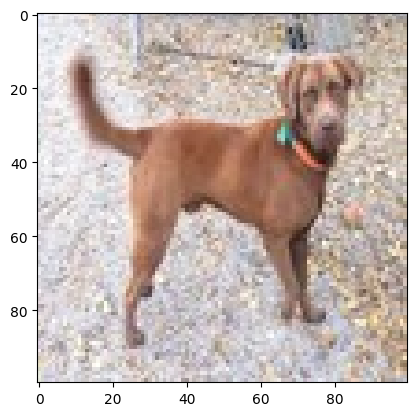

In [10]:
#Displaying random image from dataset

import matplotlib.pyplot as plt
import random

idx = random.randint (0,len(x_train))

plt.imshow(x_train[idx, :])
plt.show()

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape =(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

2022-10-22 13:16:05.524263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-22 13:16:05.524307: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-22 13:16:05.524570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Nitro-AN515-44): /proc/driver/nvidia/version does not exist
2022-10-22 13:16:05.527398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5


2022-10-22 13:16:06.003095: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 240000000 exceeds 10% of free system memory.


32/32 [==============================] - 11s 325ms/step - loss: 0.7195 - accuracy: 0.5125
Epoch 2/5
32/32 [==============================] - 10s 321ms/step - loss: 0.6832 - accuracy: 0.5650
Epoch 3/5
32/32 [==============================] - 8s 254ms/step - loss: 0.6351 - accuracy: 0.6310
Epoch 4/5
32/32 [==============================] - 7s 226ms/step - loss: 0.5764 - accuracy: 0.7010
Epoch 5/5
32/32 [==============================] - 7s 226ms/step - loss: 0.5022 - accuracy: 0.7540


In [14]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 19ms/step - loss: 0.6393 - accuracy: 0.6700


[0.6393247246742249, 0.6700000166893005]

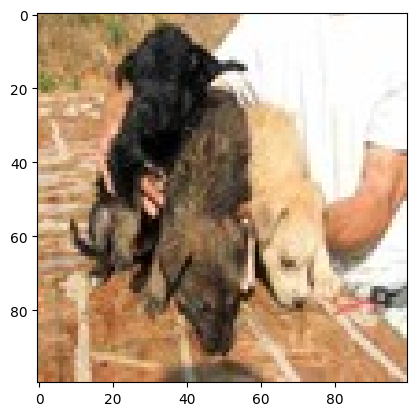

1/1 [==============================] - 0s 17ms/step
It is a  dog


In [19]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))

y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'  

print("It is a ", pred)  